## Comics project - data visualisation

This project is non-profit, personal project for education purposes only.

1) Import the data from scraped the sqlite3 db
2) Explore the data

Thanks to the people from https://www.comicsdb.cz/ project.

### Import the data from scraped the sqlite3 db

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

def fetch_df_from_db(cursor, sql):
    """Gets cursor and SQL code and runs the SQL code on the cursor. Returns ready dataframe from the db data."""
    try:
        result = cursor.execute(sql)
        rows = result.fetchall()
        columns = [column[0] for column in cursor.description]
    except:
        print("Error - have not fetched all the data from sqlite3 db - in the fetch_df_from_db()")
    else:
        return pd.DataFrame(rows, columns=columns)

def get_all_data():
    """Gets all the data from sqlite3 db."""
    try:
        conn = sqlite3.connect("./db/comics.db")
        cur = conn.cursor()
        titles_db = fetch_df_from_db(cur, "SELECT * FROM titles;")
        publishers_db = fetch_df_from_db(cur, "SELECT * FROM publishers;")
    except:
        print("Error - have not fetched all the data from sqlite3 db - in the get_all_data()")
    else:
        return [titles_db, publishers_db]
    finally:
        conn.close()

titles, publishers = get_all_data()

### Explore the data

publisher_id         0.928388
number_of_titles    61.629183
dtype: float64


Text(0.5, 1.0, 'Chart 6 - Average Number of Pages for 1 Kč/Kčs by Year')

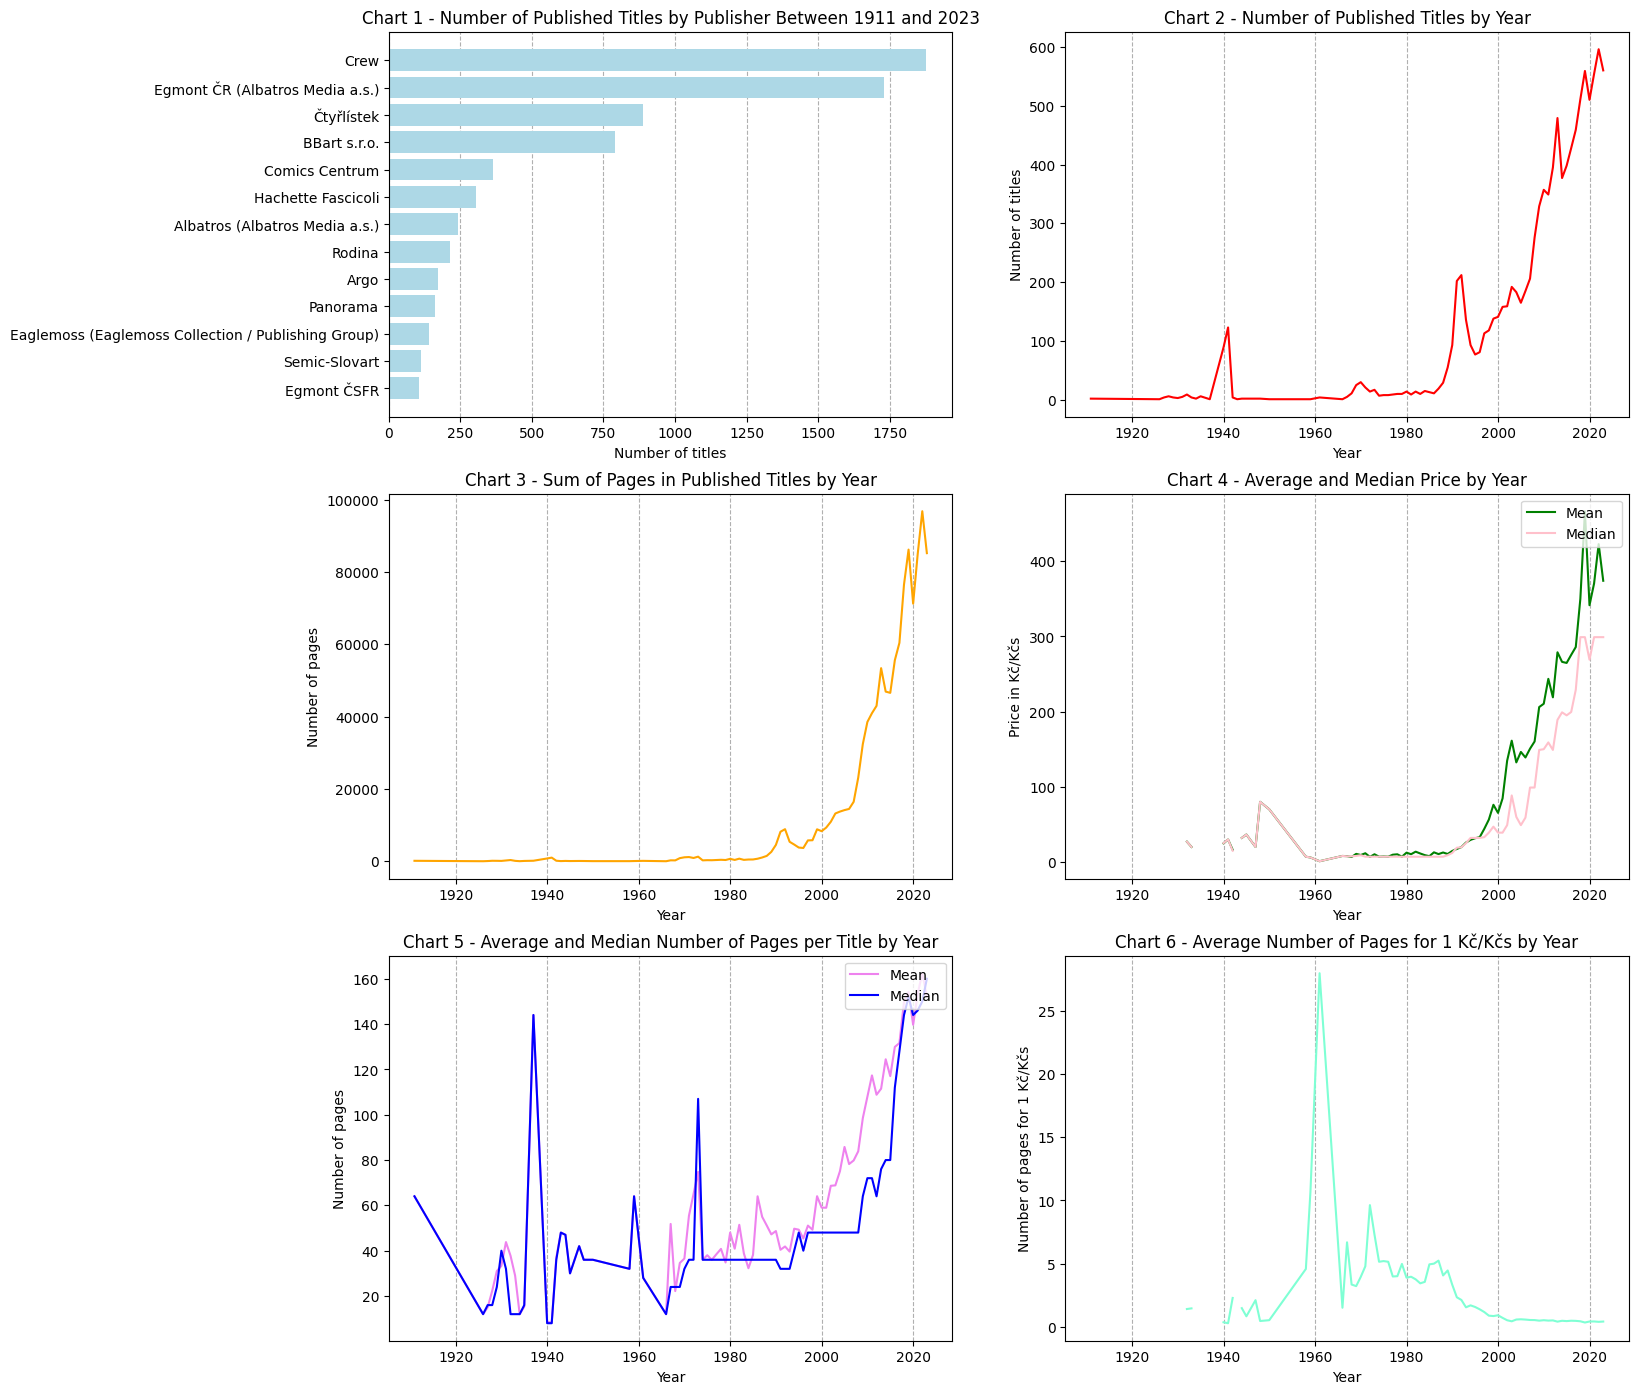

In [3]:
# df for charts
titles_chart = titles[titles["year"] > 0].groupby("year")["title_id"].count()
titles_chart_price_mean = titles[titles["year"] > 0].groupby("year")["price"].mean()
titles_chart_price_median = titles[titles["year"] > 0].groupby("year")["price"].median()
titles_chart_num_pages = titles[titles["year"] > 0].groupby("year")["pages"].sum()
titles_chart_num_pages_mean = titles[titles["year"] > 0].groupby("year")["pages"].mean()
titles_chart_num_pages_median = titles[titles["year"] > 0].groupby("year")["pages"].median()
average_price_per_average_page = {"avg_price": titles_chart_price_mean, "avg_pages": titles_chart_num_pages_mean}
average_price_per_average_page["avg_price"] = average_price_per_average_page["avg_price"].fillna(0)
average_price_per_average_page["avg_pages/avg_price"] = average_price_per_average_page["avg_pages"] / average_price_per_average_page["avg_price"]
publishers_chart = publishers[publishers["number_of_titles"] > 100].sort_values("number_of_titles")
# share of top 10 for the whole period
print(publishers[publishers["number_of_titles"] > 100].sort_values("number_of_titles", ascending = True).tail(10).sum(numeric_only=True) * 100 / publishers.sum(numeric_only=True))

fig = plt.figure(figsize=(16, 17))
ax1 = fig.add_subplot(3,2,1)
ax1.grid(True, axis="x", linestyle="--", zorder=1)
ax1.barh(publishers_chart["name"], publishers_chart["number_of_titles"], color="lightblue", zorder=2)
ax1.set_xlabel('Number of titles')
ax1.set_title('Chart 1 - Number of Published Titles by Publisher Between 1911 and 2023')

ax2 = fig.add_subplot(3,2,2)
ax2.grid(True, axis="x", linestyle="--", zorder=1)
ax2.plot(titles_chart, color="red", zorder=2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of titles')
ax2.set_title('Chart 2 - Number of Published Titles by Year')

ax3 = fig.add_subplot(3,2,3)
ax3.grid(True, axis="x", linestyle="--", zorder=1)
ax3.plot(titles_chart_num_pages, color="orange", zorder=2)
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of pages')
ax3.set_title('Chart 3 - Sum of Pages in Published Titles by Year')

ax4 = fig.add_subplot(3,2,4)
ax4.grid(True, axis="x", linestyle="--", zorder=1)
ax4.plot(titles_chart_price_mean, color="green", zorder=2, label = "Mean")
ax4.plot(titles_chart_price_median, color="pink", zorder=2,label = "Median")
ax4.set_xlabel('Year')
ax4.set_ylabel('Price in Kč/Kčs')
ax4.set_title('Chart 4 - Average and Median Price by Year')
ax4.legend(loc="upper right")

ax5 = fig.add_subplot(3,2,5)
ax5.grid(True, axis="x", linestyle="--", zorder=1)
ax5.plot(titles_chart_num_pages_mean, color="violet", zorder=2, label = "Mean")
ax5.plot(titles_chart_num_pages_median, color="blue", zorder=2, label = "Median")
ax5.set_xlabel('Year')
ax5.set_ylabel('Number of pages')
ax5.set_title('Chart 5 - Average and Median Number of Pages per Title by Year')
ax5.legend(loc="upper right")

ax6 = fig.add_subplot(3,2,6)
ax6.grid(True, axis="x", linestyle="--", zorder=1)
ax6.plot(average_price_per_average_page["avg_pages/avg_price"], color="aquamarine", zorder=2)
ax6.set_xlabel('Year')
ax6.set_ylabel('Number of pages for 1 Kč/Kčs')
ax6.set_title('Chart 6 - Average Number of Pages for 1 Kč/Kčs by Year')

In [ ]:
Dodělat median ceny za jednu stránku, možná ještě nějakej box pro publishery

### Main trends and structure

The data from https://www.comicsdb.cz/ has been operated by a group of enthusiasts. In this context, the data can not be taken as an authoritative source of data about the Czech comics market and its development (what is the definition of comics?, covers of all the published titles? etc.). But roughly, we can take it as an representative sample of the market and at least describe main trends. The database covers over ten thousands of titles published in the Czech republic/Czechoslovakia. The main trends were: 1. concentration of the market in terms of publishers - top 10 publishers by titles pubslished had over 61 % of all the published titles covered in the whole period (Chart 1 and info above the charts), 2. the number of published titles, amount of published titles, mean and median prices and number of pages of the published titles were relatively stable until 1990, but since then and especially after 2000 the numbers increased exponentiailly (Chart 2 - 5). The conclusion is, that at the end of the period there was comics market with substantially more published titles with more pages per title and higher price of an average (or median) title. On the other hand, the number of pages bought for one monetary unit (Kč/Kčs) recorded stable decrease, especially from the beginning of the 1990s. At that time (1960s - 1990s), one monetary unit bought about five pages of an comics title. After that, the number of pages bought dropped about ten times to 0.5 pages (see the Chart 6). Even if we adjusted the prices by inflation, we still get those numbers - 1 Kč/Kčs between the 1960s-1990s) bought 5 pages, 1 inflationary adjusted Kč bought about 1.5 pages in 2023 (1 Kč in 1993 = 3 Kč in 2023 --> 3 * 0.5 = 1.5 pages). Finally, one should say, that an average income in the 1960s was about 1500 Kčs, which bought about 7 200 pages of comic titles. Nowadays with average salary at about 42 000 Kč, we can buy about 21 000 pages of comics.

Sources:
Comicsdb: https://www.comicsdb.cz/; Inflation: https://inflacni-kalkulacka.cz/; Výše průměrných mezd v 60. letech: https://www.mesec.cz/clanky/mzdy-a-ceny-vcera-a-dnes/.

##